In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/carprice_clean.csv")
df.head(15)

,carburant,turbo,type_vehicule,roues_motrices,emplacement_moteur,longueur_voiture(cm),largeur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,chevaux,consommation_ville(L/100km),consommation_autoroute(L/100km),prix,marque,modele
0,gas,std,décapotable,propulsion,avant,428.75,162.81,1155.75,dohc,four,130,mpfi,111,11.20,8.71,13495.000,alfa-romeo,giulia
1,gas,std,décapotable,propulsion,avant,428.75,162.81,1155.75,dohc,four,130,mpfi,111,11.20,8.71,16500.000,alfa-romeo,stelvio
2,gas,std,hayon,propulsion,avant,434.85,166.37,1280.49,ohcv,six,152,mpfi,154,12.38,9.05,16500.000,alfa-romeo,Quadrifoglio
3,gas,std,berline,traction,avant,448.56,168.15,1060.05,ohc,four,109,mpfi,102,9.80,7.84,13950.000,audi,100ls
4,gas,std,berline,quatre_roues_motrices,avant,448.56,168.66,1280.94,ohc,five,136,mpfi,115,13.07,10.69,17450.000,audi,100ls
5,gas,std,berline,traction,avant,450.34,168.40,1137.16,ohc,five,136,mpfi,110,12.38,9.41,15250.000,audi,fox
6,gas,std,berline,traction,avant,489.46,181.36,1290.02,ohc,five,136,mpfi,110,12.38,9.41,17710.000,audi,100ls
7,gas,std,break,traction,avant,489.46,181.36,1339.91,ohc,five,136,mpfi,110,12.38,9.41,18920.000,audi,5000
8,gas,turbo,berline,traction,avant,489.46,181.36,1399.79,ohc,five,131,mpfi,140,13.84,11.76,23875.000,audi,4000
9,gas,turbo,hayon,quatre_roues_motrices,avant,452.63,172.47,1384.82,ohc,five,131,mpfi,160,14.70,10.69,17859.167,audi,5000s(diesel)


## Model LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # pour axe x et axe y , avoir une valeur de 0 a 1     x - min / min - max
from sklearn.preprocessing import OneHotEncoder




# Sélectionner les colonnes numériques
numeric_cols = ['longueur_voiture(cm)', 'largeur_voiture(cm)', 'poids_vehicule(kg)', 'chevaux', 'taille_moteur', 'consommation_ville(L/100km)', 'consommation_autoroute(L/100km)']
numeric_transformer = Pipeline(
    steps =[("MinMaxScaler", MinMaxScaler())]
)

# Sélectionner les colonnes catégorielles
categorial_cols = ["carburant", "turbo", "type_vehicule", "roues_motrices", "emplacement_moteur", "type_moteur", "nombre_cylindres", "systeme_carburant", "marque", "modele"]
categorial_transformer = Pipeline(
    steps=[("onehot_encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))]
)

# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorial_transformer, categorial_cols)
    ]
)

# Initialiser le modèle de régression linéaire
linear_regression = LinearRegression()

# Combiner le préprocesseur avec le modèle de régression linéaire
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', linear_regression)])

# Initialisation de l'estimateur

y = df["prix"]
X = df.drop("prix", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur les données de test
score = model.score(X_test, y_test)

print("R2 score:", score)

R2 score: 0.7530373062331102


/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Model RandomForestRegressor   (Meilleur model)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.preprocessing import MinMaxScaler # pour axe x et axe y , avoir une valeur de 0 a 1     x - min / min - max
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Sélectionner les colonnes numériques
numeric_cols = ['longueur_voiture(cm)', 'largeur_voiture(cm)', 'poids_vehicule(kg)', 'chevaux', 'taille_moteur', 'consommation_ville(L/100km)', 'consommation_autoroute(L/100km)']
numeric_transformer = Pipeline(
    steps =[("MinMaxScaler", MinMaxScaler())]
)

# Sélectionner les colonnes catégorielles
categorial_cols = ["carburant", "turbo", "type_vehicule", "roues_motrices", "emplacement_moteur", "type_moteur", "nombre_cylindres", "systeme_carburant", "marque", "modele"]
categorial_transformer = Pipeline(
    steps=[("onehot_encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))]
)

# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorial_transformer, categorial_cols)
    ]
)

# Combiner le préprocesseur avec le modèle de RandomForestRegressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])


# Initialisation de l'estimateur

y = df["prix"]
X = df.drop("prix", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Définir la grille des hyperparamètres
param_grid = {
    'regressor__n_estimators': [200],
    'regressor__max_depth': [10],
    'regressor__min_samples_split': [5],
    'regressor__min_samples_leaf': [2]
}

# Rechercher les meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Évaluer les performances du modèle sur les données de test
score = grid_search.score(X_test, y_test)
print("R2 score:", score)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters:", grid_search.best_params_)


# Prédire les valeurs de la variable cible pour les données de test
y_pred = grid_search.predict(X_test)

# Calculer les métriques de régression
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les métriques
print("Root Mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R2 score:", r2)

model_rf.fit(X_train, y_train)


# Enregistrer le modèle sur le disque
filename = '../models/model_carprice.pkl'
pickle.dump(model_rf, open(filename, 'wb'))



/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868

R2 score: 0.9254146538973371
Best hyperparameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
Root Mean squared error: 2255.7765085678707
Mean absolute error: 1609.8235312846195
R2 score: 0.9254146538973371


/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868

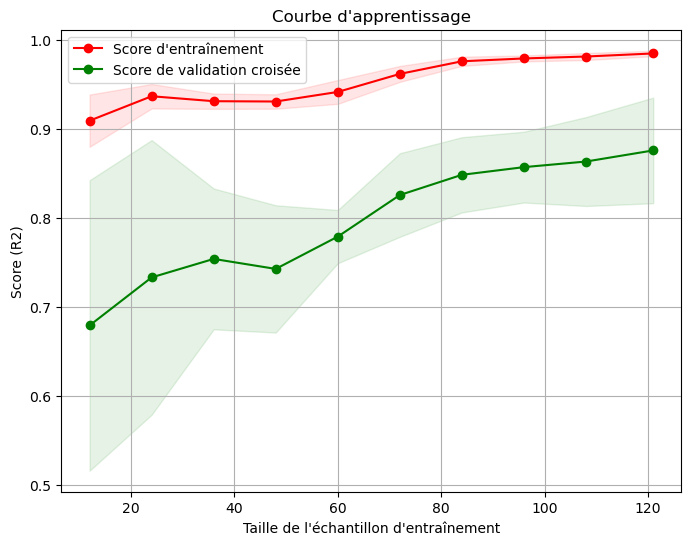

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(model_rf, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score (R2)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")

plt.legend(loc="best")
plt.show()


In [ ]:
# Entraîner le modèle avec les données d'entraînement
grid_search.fit(X_train, y_train)

# Prédire les valeurs de la variable cible pour les données de test
y_pred = grid_search.predict(X_test)

# Créer un dataframe avec les prix réels et les prix prédits
df_prix_predict = pd.DataFrame({'prix_reel': y_test, 'prix_pred': y_pred})

# Afficher les 10 premières lignes du dataframe
df_prix_predict.head(20)

/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868

,prix_reel,prix_pred
15,30760.000,33845.584678
9,17859.167,18725.198335
115,16630.000,13456.002452
78,6669.000,6827.633542
66,18344.000,11103.614087
45,8916.500,7190.958716
143,11259.000,11429.782823
177,15998.000,17421.536397
200,21485.000,19574.792974
180,7775.000,8045.668310


In [ ]:
df.head(15)

,carburant,turbo,type_vehicule,roues_motrices,emplacement_moteur,longueur_voiture(cm),largeur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,chevaux,consommation_ville(L/100km),consommation_autoroute(L/100km),prix,marque,modele
0,gas,std,décapotable,propulsion,avant,428.75,162.81,1155.75,dohc,four,130,mpfi,111,11.20,8.71,13495.000,alfa-romeo,giulia
1,gas,std,décapotable,propulsion,avant,428.75,162.81,1155.75,dohc,four,130,mpfi,111,11.20,8.71,16500.000,alfa-romeo,stelvio
2,gas,std,hayon,propulsion,avant,434.85,166.37,1280.49,ohcv,six,152,mpfi,154,12.38,9.05,16500.000,alfa-romeo,Quadrifoglio
3,gas,std,berline,traction,avant,448.56,168.15,1060.05,ohc,four,109,mpfi,102,9.80,7.84,13950.000,audi,100ls
4,gas,std,berline,quatre_roues_motrices,avant,448.56,168.66,1280.94,ohc,five,136,mpfi,115,13.07,10.69,17450.000,audi,100ls
5,gas,std,berline,traction,avant,450.34,168.40,1137.16,ohc,five,136,mpfi,110,12.38,9.41,15250.000,audi,fox
6,gas,std,berline,traction,avant,489.46,181.36,1290.02,ohc,five,136,mpfi,110,12.38,9.41,17710.000,audi,100ls
7,gas,std,break,traction,avant,489.46,181.36,1339.91,ohc,five,136,mpfi,110,12.38,9.41,18920.000,audi,5000
8,gas,turbo,berline,traction,avant,489.46,181.36,1399.79,ohc,five,131,mpfi,140,13.84,11.76,23875.000,audi,4000
9,gas,turbo,hayon,quatre_roues_motrices,avant,452.63,172.47,1384.82,ohc,five,131,mpfi,160,14.70,10.69,17859.167,audi,5000s(diesel)


## Model Gradient Boosting

Il s'agit d'un algorithme de boosting qui combine plusieurs modèles de régression pour améliorer la prédiction. Il est très efficace pour les données tabulaires et peut souvent surpasser les autres algorithmes de régression.

In [ ]:
df = pd.read_csv("../data/carprice_clean.csv")

from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur

y = df["prix"]
X = df.drop("prix", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import MinMaxScaler # pour axe x et axe y , avoir une valeur de 0 a 1     x - min / min - max

# Sélectionner les colonnes numériques
numeric_cols = ['longueur_voiture(cm)', 'largeur_voiture(cm)', 'poids_vehicule(kg)', 'chevaux', 'consommation_ville(L/100km)', 'consommation_autoroute(L/100km)','taille_moteur']

# Créer une instance de MinMaxScaler
scaler = MinMaxScaler()

# Normaliser les données d'entraînement
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Normaliser les données de test
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


from sklearn.preprocessing import OneHotEncoder

# Sélectionner les colonnes catégorielles
categorial_cols = ["carburant", "turbo", "type_vehicule", "roues_motrices", "emplacement_moteur", "type_moteur", "nombre_cylindres", "systeme_carburant", "marque", "modele"]

# Créer une instance de OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=True, handle_unknown="ignore")

# Appliquer le One-Hot Encoding aux colonnes catégorielles
X_train_cat = onehot_encoder.fit_transform(X_train[categorial_cols])
X_test_cat = onehot_encoder.transform(X_test[categorial_cols])


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_cols),
        ('cat', onehot_encoder, categorial_cols)
    ]
)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


# Initialiser le modèle Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Combiner le préprocesseur avec le modèle Gradient Boosting
model_gbr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', gbr)])

# Entraîner le modèle sur les données d'entraînement
model_gbr.fit(X_train, y_train)

# Prédire les valeurs de la variable cible pour les données de test
y_pred = model_gbr.predict(X_test)

# Calculer les métriques de régression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # obtenir la racine carrée du MSE
r2 = r2_score(y_test, y_pred)

# Afficher les métriques
print("Mean squared error:", mse)
print("Root Mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R2 score:", r2)





/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean squared error: 7208642.940378529
Root Mean squared error: 2684.891606821126
Mean absolute error: 1782.422332913936
R2 score: 0.8943389591406496
